# Pivot Tables with Pandas - Lab

## Introduction

In this lab, we'll learn how to make use of our newfound knowledge of pivot tables to work with real-world data.  We'll start by exploring 

## Objectives

You will be able to:

* Understand and explain what a multi-level hierarchical index is
* Understand, explain the difference and use df.pivot and pd.pivot_table
* Switch between “long” and “wide” in a DataFrame using stack() and unstack()
* Transform “wide” to “long” DataFrames using `melt`

## Getting Started

### Import Pandas and Matplotlib.pyplot Using Standard Aliases

In the cell below:

* Import `pandas` and set the standard alias
* Import `matplotlib.pyplot` and set the standard alias
* Run the ipython magic command to display matplotlib graphs inline within the notebook

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## Load the Data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab seperated values' instead of 'comma seperated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` method.

In [3]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t' ) 

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [4]:
df.head(3)

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

## Groupby Aggregations

Complete the following groupby statements.

### 1) Groupby State and Gender. Sum the values.

In [5]:
groupby_df = df.groupby(['State', 'Gender']).sum()
#groupby_df

### 2) Groupby State and Gender and Race. Find the average values.

In [6]:
groupby_df2 = df.groupby(['State', 'Gender', 'Race']).sum()
# groupby_df2


### 3) Groupby Gender and Race. Find the minimum values.

In [7]:
groupby_df3 = df.groupby(['Gender', 'Race']).min()
# groupby_df3

### 4) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

In [8]:
groupby_df3.groupby(['State'])

### Inspecting our Data

Let's go one step further and get a print-out of the data type of each column. 

In the cell below, get the `.info()` of our DataFrame, and note the data type that each column is currently stored as.  

In [9]:
groupby_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, (Female, American Indian or Alaska Native) to (Male, White)
Data columns (total 10 columns):
Notes                       0 non-null float64
State                       8 non-null object
State Code                  8 non-null int64
Ten-Year Age Groups         8 non-null object
Ten-Year Age Groups Code    8 non-null object
Gender Code                 8 non-null object
Race Code                   8 non-null object
Deaths                      8 non-null int64
Population                  8 non-null object
Crude Rate                  8 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 812.0+ bytes


Let's look at some samples from the Population column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [10]:
df['Population'].head(5)

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

Just to be extra sure, let's check the value counts to see how many times each unique value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [11]:
df['Population'].value_counts()

Not Applicable    75
249                2
85539              2
12217              2
4574               2
87405              2
113598             2
860                2
2777               2
2816               2
1512               2
8198               2
36460              2
14810              2
42847              2
148                2
16653              2
6420               2
4412               2
367                2
3654               2
9192               2
3240               2
2115               2
907                2
2146               2
30070              2
96274              2
11680              2
4258               2
                  ..
169448             1
2710361            1
89564              1
1693891            1
1212683            1
387476             1
67675              1
4284775            1
3032               1
66865              1
788904             1
78441              1
709012             1
106912             1
13241              1
6468981            1
2250529      

Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### 5 a) Reformat the Population Column as an Integer
As stands, not all values will be able to be reformated as integers. Most of the cells in the the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `"Not Applicable"`.

We need to remove these rows before we can cast the Population column to an Integer data type. 

In the cell below:

* Slice the rows of `df` where the Population column is equal to `'Not Applicable'`.
* Use `to_drop.index`  to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`
* Cast the Population column to an integer data type using the `.astype()` function, with the single parameter `int64` passed in. 
* Print the Population column's `dtype` attribute to confirm it is now stored in `int64` format. 

**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [12]:
len(df)

4115

In [13]:
#Your code here
to_drop = df[df['Population']=='Not Applicable']
df.drop(index=to_drop.index,axis=0, inplace=True)
df['Population'] = df['Population'].astype(int)
df.dtypes

Notes                       float64
State                        object
State Code                    int64
Ten-Year Age Groups          object
Ten-Year Age Groups Code     object
Gender                       object
Gender Code                  object
Race                         object
Race Code                    object
Deaths                        int64
Population                    int64
Crude Rate                   object
dtype: object

### 5 b) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the of the Mean Population by State.

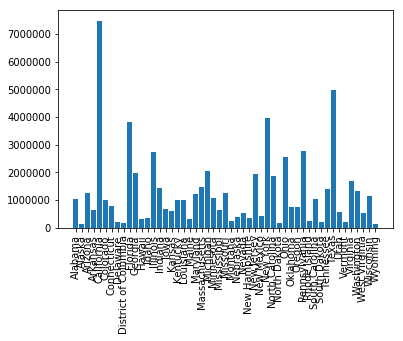

In [14]:
mean_df = df.groupby('State').mean()
plt.bar(mean_df.index, mean_df['Population'])
plot = plt.xticks(mean_df.index, rotation='vertical') 

Below we will investigate how we can combine the **pivot** method along with the **groupby** method to combine some cool **stacked bar charts**!

## Using Aggregate Functions

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the head of this of this new DataFrame.

In [15]:
# A sample groupby similar to above. 
grouped = df.groupby(['State', 'Gender'])['Deaths','Population'].agg([np.mean, np.max, np.min, np.std])
grouped

Deaths                              \
                                     mean    amax amin            std   
State                Gender                                             
Alabama              Female  10753.325000  116297   10   24612.250487   
                     Male    10765.850000   88930   10   20813.538537   
Alaska               Female    679.975000    4727   13    1154.870455   
                     Male      860.357143    5185   12    1411.777392   
Arizona              Female   8998.386364  133923   21   26245.941003   
                     Male    10036.204545  110347   28   24736.056309   
Arkansas             Female   6621.615385   81126   11   16794.044835   
                     Male     6301.690476   61671   10   14165.374833   
California           Female  48312.840909  720306   37  132121.217672   
                     Male    49555.522727  473226   42  108799.190468   
Colorado             Female   6460.162791  102790   11   19302.972849   
                     Male     6442.500000   67020   11   15771.618909   
Connecticut          Female   7144.641026  123075   12   22486.493850   
                     Male     6315.300000   65879   11   15808.791538   
Delaware             Female   2000.029412   21627   11    4641.612706   
                     Male     1940.914286   15976   13    3808.261525   
District of Columbia Female   1497.580645   10428   11    2679.916190   
                     Male     1534.806452    7066   10    2265.979588   
Florida              Female  36019.071429  550300   19  104255.285830   
                     Male    36771.340909  411612   10   91930.916198   
Georgia              Female  15372.317073  162447   20   33653.636538   
                     Male    14621.069767  116794   12   27570.074438   
Hawaii               Female   2182.944444   23476   10    4781.899001   
                     Male     2341.450000   18791   11    4436.617804   
Idaho                Female   2874.323529   38088   11    7990.822485   
                     Male     2693.421053   27053   15    6665.940386   
Illinois             Female  23432.926829  348960   13   64838.079239   
                     Male    21698.000000  210711   15   47947.187466   
Indiana              Female  13425.717949  185795   11   37468.783350   
                     Male    12700.275000  126266   12   29618.163156   
...                                   ...     ...  ...            ...   
Oklahoma             Female   7451.931818  103703   11   20397.710505   
                     Male     7468.909091   76790   14   17197.152298   
Oregon               Female   6560.840909  115055   10   21138.542646   
                     Male     6528.977273   74395   13   17478.932830   
Pennsylvania         Female  29972.575000  473687   10   89923.668919   
                     Male    27187.463415  297094   20   66807.101332   
Rhode Island         Female   2746.970588   42473   10    8334.872239   
                     Male     2239.243243   22680   11    5553.951543   
South Carolina       Female   9737.891892   93345   25   20390.325422   
                     Male     9078.292683   72346   12   17092.434648   
South Dakota         Female   1932.757576   28814   14    5607.382037   
                     Male     1800.500000   17216   10    4260.226617   
Tennessee            Female  13334.325000  161305   13   33524.701804   
                     Male    13333.050000  118394   15   28337.345393   
Texas                Female  33897.953488  451158   11   89297.056719   
                     Male    34347.636364  332525   11   76342.901372   
Utah                 Female   3046.547619   47195   10    9077.541206   
                     Male     3081.511628   32732   11    7601.148248   
Vermont              Female   2124.695652   20967   10    5088.560561   
                     Male     1785.846154   12790   12    3701.620269   
Virginia             Female  13232.146341  166555   10   32699.660272   
                    

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [16]:
grouped.index

MultiIndex(levels=[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Female', 'Male']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `reset_index()` function.  Then, display the head of the DataFrame.  

In [17]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather then the index.
grouped = grouped.reset_index()

Note how the way the index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [18]:
grouped.index

RangeIndex(start=0, stop=102, step=1)

However, look again at the displayed DataFrame--specifically, the columns.  Resetting the index has caused the DataFrame to use a mutlti-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [19]:
#Notice that this causes columns to be MultiIndexed!
grouped.columns

MultiIndex(levels=[['Deaths', 'Population', 'Gender', 'State'], ['mean', 'amax', 'amin', 'std', '']],
           labels=[[3, 2, 0, 0, 0, 0, 1, 1, 1, 1], [4, 4, 0, 1, 2, 3, 0, 1, 2, 3]])

### Column Levels

Since we're working with miulti-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `get_level_values` method contained within the DataFrame's `columns` object to get the values for the outermost layer of the index. 

In [20]:
grouped.columns.get_level_values(1)

Index(['', '', 'mean', 'amax', 'amin', 'std', 'mean', 'amax', 'amin', 'std'], dtype='object')

Now, get the level values for the inner layer of the index. 

In [21]:
grouped.columns.get_level_values(0)

Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population',
       'Population', 'Population', 'Population'],
      dtype='object')

## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it--but take some time to examine the code in the cell below and see if you can understand how it works! 

In [22]:
#We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
#The list comprehension above is more complicated then what we need but creates a nicer formatting and
#demonstrates using a conditional within a list comprehension.
#This simpler version works but has some tail underscores where col1 is blank:
#grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Index(['State', 'Gender', 'Deaths_mean', 'Deaths_amax', 'Deaths_amin',
       'Deaths_std', 'Population_mean', 'Population_amax', 'Population_amin',
       'Population_std'],
      dtype='object')

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the head of the `grouped` DataFrame. 

In [23]:
grouped.head()

,State,Gender,Deaths_mean,Deaths_amax,Deaths_amin,Deaths_std,Population_mean,Population_amax,Population_amin,Population_std
0,Alabama,Female,10753.325000,116297,10,24612.250487,1.078713e+06,4334752,2087,1.400309e+06
1,Alabama,Male,10765.850000,88930,10,20813.538537,1.014946e+06,4284775,1129,1.397830e+06
2,Alaska,Female,679.975000,4727,13,1154.870455,1.440403e+05,682855,1224,2.015793e+05
3,Alaska,Male,860.357143,5185,12,1411.777392,1.518884e+05,770502,578,2.238843e+05
4,Arizona,Female,8998.386364,133923,21,26245.941003,1.246502e+06,6265346,12211,2.096632e+06


## Using Pivots

Now, we'll gain some practice using the DataFrame class's built-in `.pivot()` method.  

In the cell below, call the DataFrame's pivot method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the head of our new `pivot` DataFrame to see what it looks like. 

In [24]:
# Now it's time to pivot!
pivot = grouped.pivot(index='State', columns='Gender', values='Deaths_mean')
pivot

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727
Colorado,6460.162791,6442.500000
Connecticut,7144.641026,6315.300000
Delaware,2000.029412,1940.914286
District of Columbia,1497.580645,1534.806452


Great! We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the head of the object to see if we can detect any changes.

In [25]:
# Again, notice the subtle difference of reseting the index:
pivot = grouped.reset_index()

In [26]:
pivot

,index,State,Gender,Deaths_mean,Deaths_amax,Deaths_amin,Deaths_std,Population_mean,Population_amax,Population_amin,Population_std
0,0,Alabama,Female,10753.325000,116297,10,24612.250487,1.078713e+06,4334752,2087,1.400309e+06
1,1,Alabama,Male,10765.850000,88930,10,20813.538537,1.014946e+06,4284775,1129,1.397830e+06
2,2,Alaska,Female,679.975000,4727,13,1154.870455,1.440403e+05,682855,1224,2.015793e+05
3,3,Alaska,Male,860.357143,5185,12,1411.777392,1.518884e+05,770502,578,2.238843e+05
4,4,Arizona,Female,8998.386364,133923,21,26245.941003,1.246502e+06,6265346,12211,2.096632e+06
5,5,Arizona,Male,10036.204545,110347,28,24736.056309,1.235121e+06,6692127,6877,2.129562e+06
6,6,Arkansas,Female,6621.615385,81126,11,16794.044835,6.650842e+05,2878953,1766,9.620027e+05
7,7,Arkansas,Male,6301.690476,61671,10,14165.374833,5.952392e+05,2844754,818,9.479750e+05
8,8,California,Female,48312.840909,720306,37,132121.217672,7.511866e+06,35338781,40061,1.108854e+07
9,9,California,Male,49555.522727,473226,42,108799.190468,7.436590e+06,38013386,22096,1.161212e+07


### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

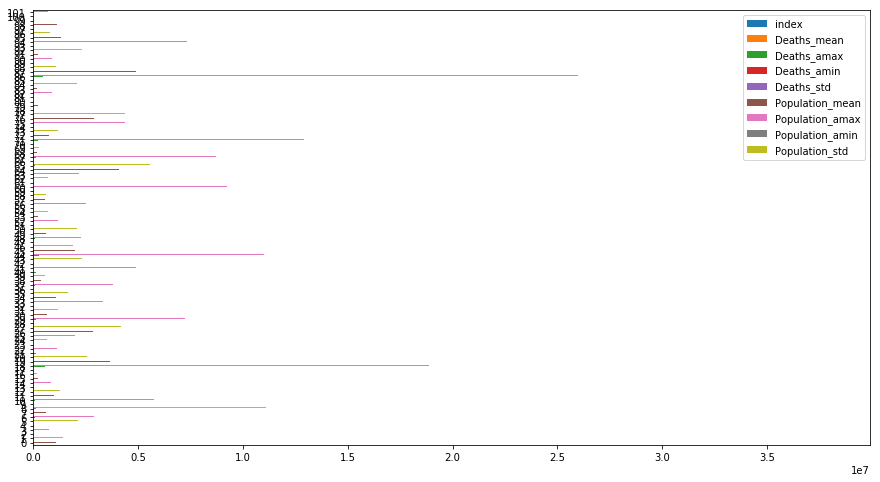

In [27]:
# Now let's make a sweet bar chart!!
pivot.plot(kind='barh', figsize=(15,8))

Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods--do not rebind `pivot` to be equal to this line of code. 

In [28]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
index              102 non-null int64
State              102 non-null object
Gender             102 non-null object
Deaths_mean        102 non-null float64
Deaths_amax        102 non-null int64
Deaths_amin        102 non-null int64
Deaths_std         102 non-null float64
Population_mean    102 non-null float64
Population_amax    102 non-null int64
Population_amin    102 non-null int64
Population_std     102 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 8.8+ KB


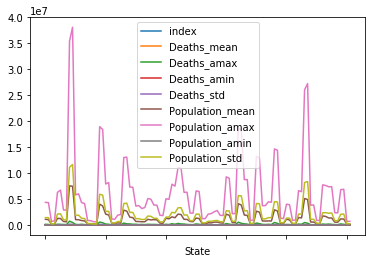

In [29]:
#Where's the states?! Notice the y-axis is just a list of numbers.
#This is populated by the DataFrame's index.
#When we used the .reset_index() method, we created a new numbered index to name each row. 
#Let's fix that by making state the index again.

pivot.set_index('State').plot()



Now, that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [30]:
pivot.head()

,index,State,Gender,Deaths_mean,Deaths_amax,Deaths_amin,Deaths_std,Population_mean,Population_amax,Population_amin,Population_std
0,0,Alabama,Female,10753.325000,116297,10,24612.250487,1.078713e+06,4334752,2087,1.400309e+06
1,1,Alabama,Male,10765.850000,88930,10,20813.538537,1.014946e+06,4284775,1129,1.397830e+06
2,2,Alaska,Female,679.975000,4727,13,1154.870455,1.440403e+05,682855,1224,2.015793e+05
3,3,Alaska,Male,860.357143,5185,12,1411.777392,1.518884e+05,770502,578,2.238843e+05
4,4,Arizona,Female,8998.386364,133923,21,26245.941003,1.246502e+06,6265346,12211,2.096632e+06


In [31]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
#The above method returned a DataFrame with State as index and we plotted it,
#but it did not update the DataFrame itself.


Note that the index has not changed.  That's because the code we wrote when we set the index to the 'State' column returns a copy of the DataFrame object with the index set to 'State'--by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

In [ ]:
#If we wanted to more permanently change the index we would set it first and then plot:

pivot =  

Again, let's check the head of the DataFrame to confirm that the index structure has changed.  

Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

In [ ]:
# Lastly, let's stack each of these bars for each state.
#Notice we don't have to worry about index here, because we've already set it above.


## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

As we can see, the `stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index! This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [ ]:
pivot = None

Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results!

In the cell below, set pivot equal to `pivot.unstack()` again, and then display the `pivot` object to see how things have changed.

In [ ]:
pivot = None

After calling unstack a second time, we can see that `pivot` has a flattened structure, since it has been completely unstacked!

## Summary

In this lab, we learned how to:

* Use `groupby` to stack and slice data conditionally
* Use aggregate functions in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 